In [32]:
from cl_model import Cl_distribution
import networkx as nx
import matplotlib.pyplot as plt
import queue
import random

In [44]:
n = 1000
m = 20000

<function matplotlib.pyplot.show(*args, **kw)>

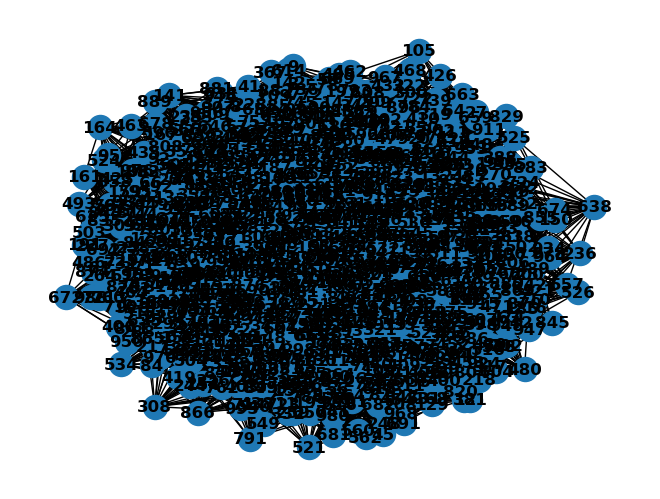

In [45]:
rg = nx.gnm_random_graph(n, m)
nx.draw(rg, with_labels=True, font_weight='bold')
plt.show

In [46]:
rg.degree
rg.degree(1)

49

In [47]:
# print degree sequence
degree_sequence = list(d for n, d in rg.degree())
print(degree_sequence)
rg.number_of_edges()

[49, 49, 48, 37, 44, 41, 41, 43, 32, 34, 35, 43, 28, 34, 51, 47, 49, 45, 38, 46, 34, 36, 39, 37, 46, 38, 32, 30, 34, 43, 40, 48, 36, 31, 48, 40, 50, 41, 46, 41, 40, 35, 48, 41, 37, 30, 51, 47, 31, 36, 37, 37, 46, 32, 41, 30, 38, 45, 47, 45, 42, 40, 44, 38, 34, 31, 41, 42, 50, 38, 41, 43, 47, 37, 39, 46, 40, 41, 43, 50, 37, 37, 41, 47, 28, 44, 43, 51, 46, 39, 40, 51, 39, 43, 43, 33, 50, 39, 46, 44, 48, 35, 36, 53, 42, 22, 36, 35, 34, 37, 37, 38, 47, 43, 52, 43, 39, 32, 39, 40, 50, 39, 44, 37, 33, 33, 44, 38, 50, 36, 43, 44, 37, 45, 45, 38, 42, 42, 43, 52, 43, 34, 37, 46, 32, 37, 48, 38, 41, 43, 30, 40, 43, 39, 41, 39, 46, 38, 36, 40, 44, 34, 37, 40, 27, 45, 38, 31, 30, 50, 35, 50, 39, 39, 39, 46, 50, 37, 51, 43, 47, 50, 42, 35, 36, 28, 40, 37, 45, 44, 36, 35, 49, 43, 52, 37, 38, 38, 36, 40, 30, 37, 42, 36, 43, 46, 42, 48, 28, 51, 36, 41, 45, 37, 51, 36, 34, 37, 33, 43, 32, 45, 42, 42, 41, 38, 41, 37, 39, 47, 47, 55, 48, 33, 45, 38, 27, 42, 40, 44, 42, 42, 41, 43, 34, 42, 41, 35, 35, 48,

20000

In [ ]:
cl_helper = Cl_distribution(degree_sequence)
iter = 0
G = nx.Graph()
for i in range (0,n):
    G.add_node(i)
while G.number_of_edges() < m and iter<10000:
    id1 = cl_helper.rvs()
    if G.degree(id1)<degree_sequence[id1]:
        id2 = cl_helper.rvs()
        while id2==id1 or G.degree(id2)>=degree_sequence[id2]:
            id2 = cl_helper.rvs()
        G.add_edge(id1,id2)
    iter+=1

999

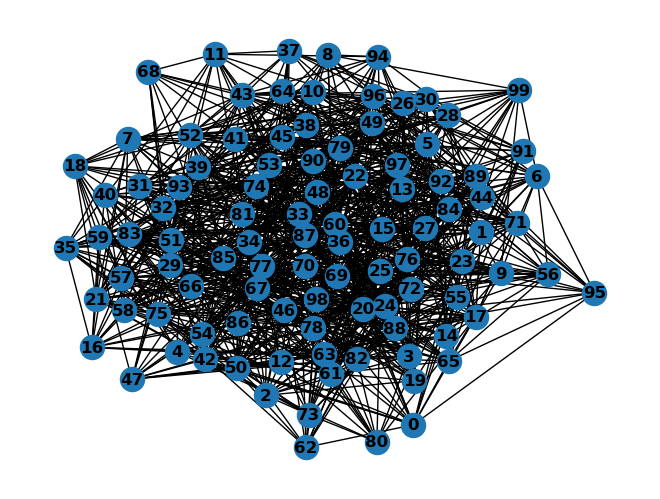

In [ ]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show
G.number_of_edges()

In [ ]:
# pseudo-clustering coefficient
## choose a node at random, choose two of its neighbors at random, and check if they are connected.

def average_clustering(G, trials=1000):
    triangles = 0
    nodes = G.nodes()
    for i in [int(random.random() * n) for i in range(trials)]:
        # neighbors of i
        nbrs = list(G.adj[i])
        if len(nbrs) < 2:
            continue
        u, v = random.sample(nbrs, 2)
        if u in G[v]:
            triangles +=1
    return triangles / float(trials)

In [ ]:
average_clustering(rg)

0.22

In [ ]:
average_clustering(G)

0.192